In [1]:
library("DESeq2")

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from ‘package:stats’:

    xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, as.vector, cbind, colnames,
    do.call, duplicated, eval, evalq, Filter, Find, get, intersect,
    is.unsorted, lapply, Map, mapply, match, mget, order, paste, pmax,
    pmax.int, pmin, pmin.int, Position, rank, rbind, Reduce, rep.int,
    rownames, sapply, setdiff, sort, table, tapply, union, unique,
    unlist, unsplit

Loading required package: IRanges
Loading required package: GenomicRanges
Loading required package:

In [2]:
main.dir = "/home/kunal/tscc_projects/tanner/data/family3/rna-seq//bcbio_03202015"
main.file = file.path(main.dir, "853005_Tanner_RNASeq", "annotated_combined.counts")

#### Load Data

In [3]:
count.data = read.table(main.file, row.names=1, header=TRUE)
gene.symbols = count.data$symbol
count.data = count.data[,1:dim(count.data)[2]-1]

In [4]:
head(count.data)

,X001_002_RNA_Blood_Scripps.1_09.25.14,X001_002_RNA_Blood_Scripps.5_10.29.14,X001_002_RNA_Blood_Scripps.7_11.25.14,X001_002_RNA_Blood_Scripps.9.1_12.19.14,X001_002_RNA_Blood_Scripps.10.1_02.02.15,X001_002_RNA_Blood_Scripps.11.1_03.17.15,X001_002_RNA_Blood_Scripps.12.1_04.06.15,X001_002_RNA_Blood_Scripps.13.1_05.11.15,X001_002_RNA_Blood_Scripps.14.1_06.10.15,X001_002_RNA_Blood_Scripps.15.1_07.02.15,X001_002_RNA_Blood_Scripps.16.1_08.10.15,X001_003_RNA_Blood_Scripps.2_09.25.14,X001_003_RNA_Blood_Scripps.6_10.29.14,X001_003_RNA_Blood_Scripps.8_11.25.14,X001_004_RNA_Blood_Scripps.3_09.25.14,X001_005_RNA_Blood_Scripps.4_09.25.14
ENSG00000223972,3,4,2,4,4,3,4,0,1,0,0,1,3,1,5,5
ENSG00000227232,13,11,10,16,18,6,8,1,4,1,1,5,14,11,7,17
ENSG00000243485,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000237613,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000268020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000240361,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
samples = colnames(count.data)
sample.ids = sapply(strsplit(samples, '_'), function(x) {x[2]})
sample.dates = sapply(strsplit(samples, '_'), function(x) {x[length(x)]})
samples = paste(sample.ids, sample.dates, sep='_')

In [6]:
samples

[1] "002_09.25.14" "002_10.29.14" "002_11.25.14" "002_12.19.14" "002_02.02.15"
 [6] "002_03.17.15" "002_04.06.15" "002_05.11.15" "002_06.10.15" "002_07.02.15"
[11] "002_08.10.15" "003_09.25.14" "003_10.29.14" "003_11.25.14" "004_09.25.14"
[16] "005_09.25.14"

In [7]:
column.data = data.frame(cbind(sample.ids, sample.dates))
column.data[,'sample.ids'] = as.factor(column.data[,'sample.ids'])
column.data[,'sample.dates'] = as.factor(as.Date(column.data[,'sample.dates'], 
                                    "%m.%d.%y"))

In [8]:
rownames(column.data) = samples
colnames(count.data) = samples

In [9]:
dds = DESeqDataSetFromMatrix(count.data, column.data, ~ sample.ids)

In [10]:
head(dds)

class: DESeqDataSet 
dim: 1 16 
exptData(0):
assays(1): counts
rownames(1): ENSG00000223972
rowData metadata column names(0):
colnames(16): 002_09.25.14 002_10.29.14 ... 004_09.25.14 005_09.25.14
colData names(2): sample.ids sample.dates

#### Calculate Normalized Values

In [12]:
dds <- estimateSizeFactors(dds)
dds <- estimateDispersions(dds)

gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates


In [14]:
normalized.counts = counts(dds,normalized=TRUE)

In [15]:
write.table(normalized.counts, 'deseq.normalized.for.vicki.tsv', 
           sep="\t")

#### Variance Stabilization

In [13]:
rld <- rlog(dds)
vsd <- varianceStabilizingTransformation(dds)
rlogMat <- assay(rld)
vstMat <- assay(vsd)

### Heatmaps

In [14]:
library("RColorBrewer")
library("gplots")
select <- order(rowMeans(counts(dds,normalized=TRUE)),decreasing=TRUE)[1:30]
hmcol <- colorRampPalette(brewer.pal(9, "GnBu"))(100)


Attaching package: ‘gplots’

The following object is masked from ‘package:IRanges’:

    space

The following object is masked from ‘package:stats’:

    lowess



In [76]:
gene.symbols

ERROR: Error in eval(expr, envir, enclos): object 'gene.symbols' not found


In [15]:
data = counts(dds,normalized=TRUE)[select,]
rownames(data) = gene.symbols[select]

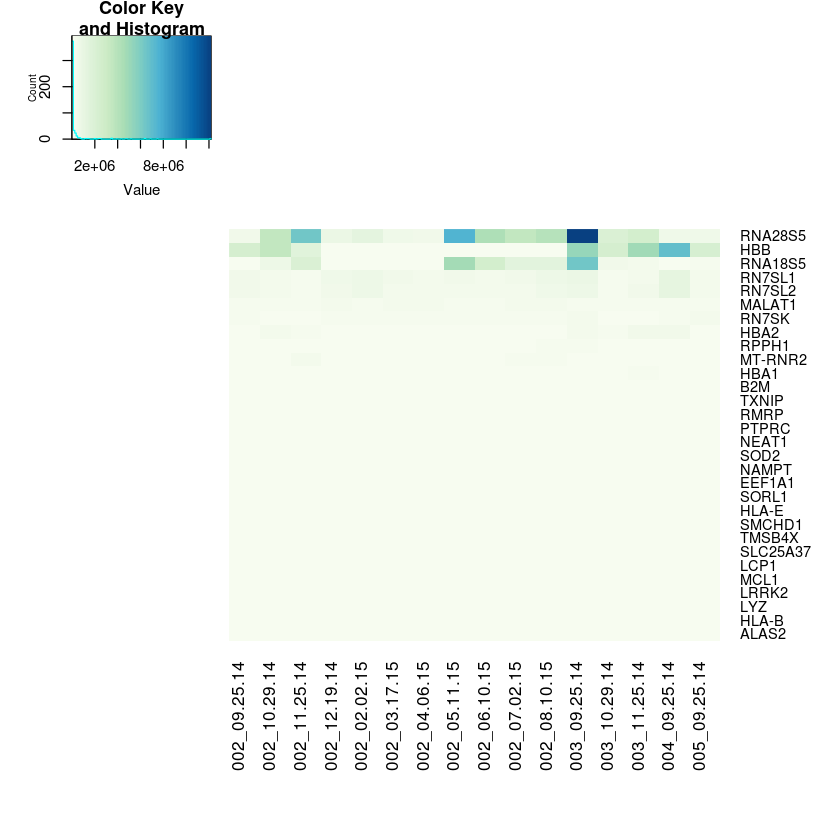

In [16]:
heatmap.2(data, col = hmcol,
Rowv = FALSE, Colv = FALSE, scale="none",
dendrogram="none", trace="none", margin=c(10,6))

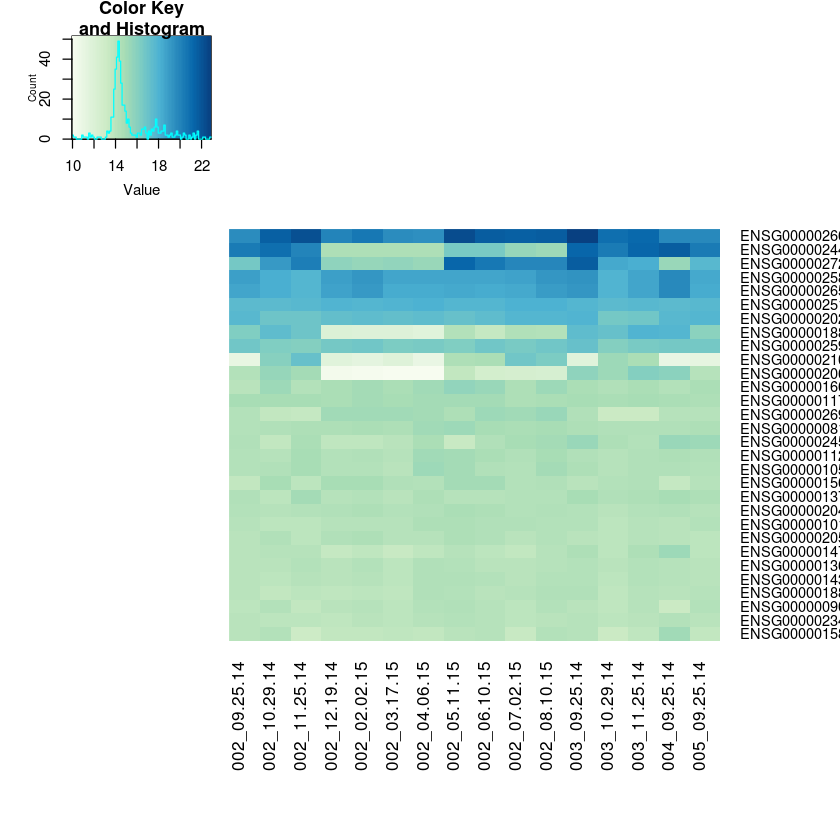

In [17]:
data = assay(rld)[select,]
rownames(data) = gene.symbols[select]
heatmap.2(assay(rld)[select,], col = hmcol,
Rowv = FALSE, Colv = FALSE, scale="none",
dendrogram="none", trace="none", margin=c(10, 6))

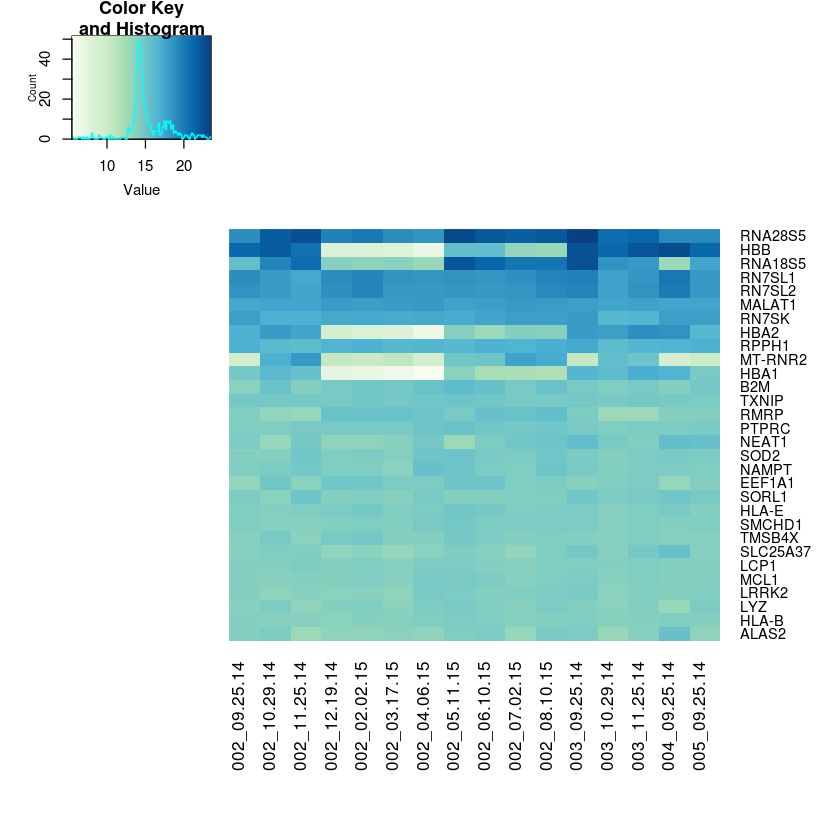

In [18]:
data = assay(vsd)[select,]
rownames(data) = gene.symbols[select]
heatmap.2(data, col = hmcol,
Rowv = FALSE, Colv = FALSE, scale="none",
dendrogram="none", trace="none", margin=c(10, 6))

ERROR: Error in eval(expr, envir, enclos): object 'condition' not found


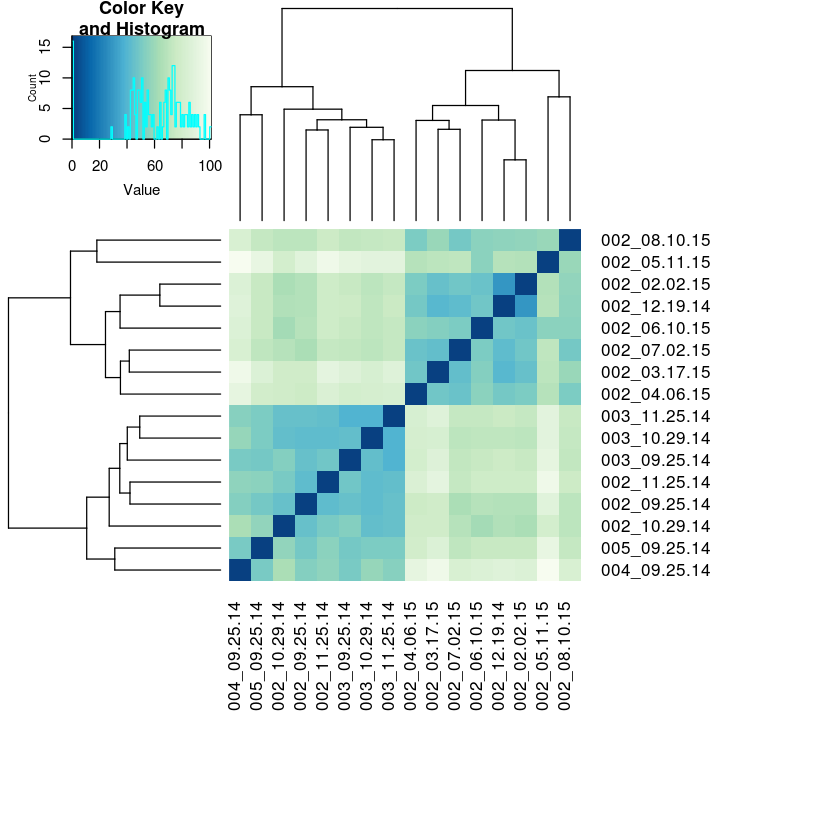

In [19]:
distsRL <- dist(t(assay(rld)))
mat <- as.matrix(distsRL)
rownames(mat) <- colnames(mat) <- with(colData(dds),
paste(condition, type, sep=" : "))
hc <- hclust(distsRL)
heatmap.2(mat, Rowv=as.dendrogram(hc),
symm=TRUE, trace="none",
col = rev(hmcol), margin=c(13, 13))

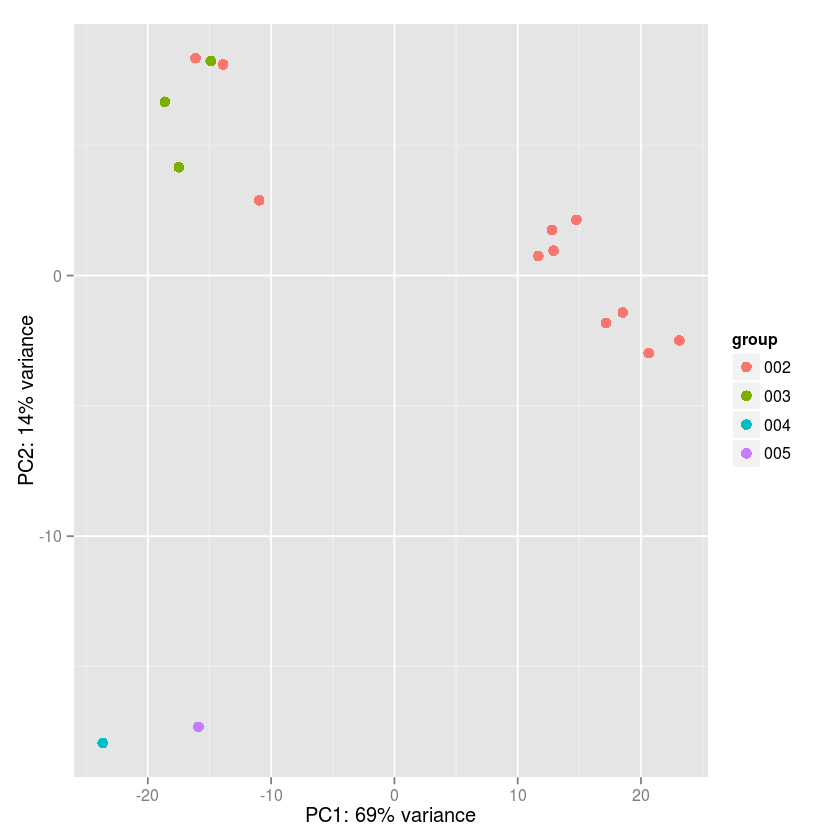

In [23]:
plotPCA(rld, intgroup=c("sample.ids"))

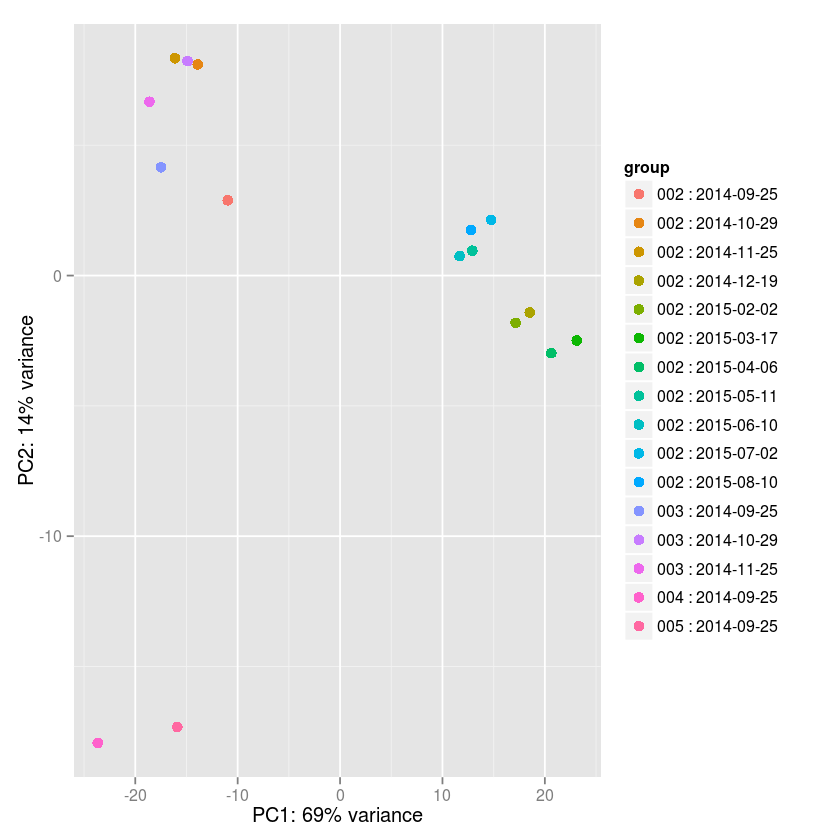

In [22]:
plotPCA(rld, intgroup=c("sample.ids", "sample.dates"))

#### Write all these files

In [34]:
deseq.file = gsub("annotated_combined.counts","deseq.counts", main.file)
write.table(counts(dds,normalized=TRUE), deseq.file, sep="/t")

In [35]:
regularized.log.file = gsub("annotated_combined.counts","deseq.regularized.log.counts", main.file)
write.table(assay(rld), regularized.log.file, sep="/t")

In [36]:
variance.stabilized.file = gsub("annotated_combined.counts","deseq.variance.stablized.counts", main.file)
write.table(assay(vsd), variance.stabilized.file, sep="/t")